In [1]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from mutagen.mp3 import MP3
import math

In [2]:
root_path = 'audio/'
audio_path = root_path + 'mvmt 3.mp3'

In [3]:
# Amplitude of sound throughout movement
y_full, sr_full = librosa.load(audio_path, sr=41000)
durr = MP3(audio_path).info.length
print(durr)
X = librosa.stft(y_full)

c:\users\cuian\documents\programming projects\fs63c_final\venv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


724.4467120181406


In [4]:
# Spectrograms
H, P = librosa.decompose.hpss(X)
Xdb = librosa.amplitude_to_db(np.abs(X), ref=np.max)
Hdb = librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(X)))
Pdb = librosa.amplitude_to_db(np.abs(P), ref=np.max(np.abs(X)))

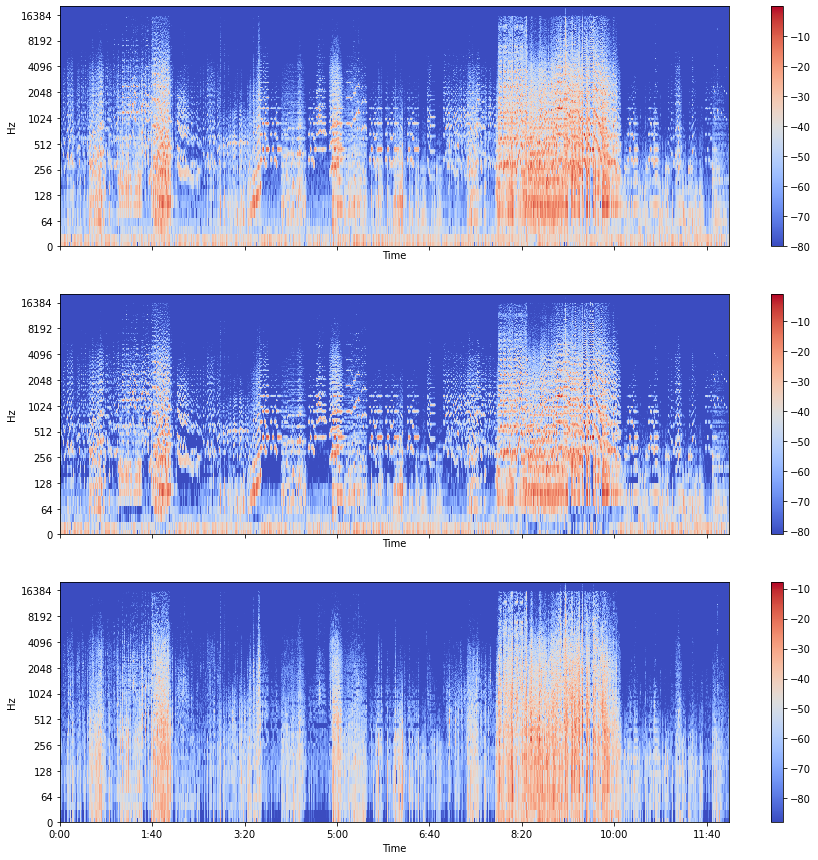

In [5]:
# Visualize spectrograms
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(15, 15))

img1 = librosa.display.specshow(Xdb, sr=sr_full, x_axis='time', y_axis='log', ax=ax[0], cmap='coolwarm')
img2 = librosa.display.specshow(Hdb, sr=sr_full, x_axis='time', y_axis='log', ax=ax[1], cmap='coolwarm')
img3 = librosa.display.specshow(Pdb, sr=sr_full, x_axis='time', y_axis='log', ax=ax[2], cmap='coolwarm')

fig.colorbar(mappable=img1, ax=ax[0])
fig.colorbar(mappable=img2, ax=ax[1])
fig.colorbar(mappable=img3, ax=ax[2])

In [6]:
# Found motifs
all_motifs = [
(85.54517073170732, 85.7699512195122, 86.39434146341463, 86.7939512195122),
(145.41541463414634, 146.8140487804878, 148.38751219512196, 149.83609756097562),
(151.45951219512196, 151.70926829268294, 152.83317073170733, 153.80721951219513),
(479.11180487804876, 479.36156097560973, 479.7611707317073, 480.13580487804876),
(492.8983414634146, 493.1480975609756, 493.52273170731706, 493.8973658536585),
(503.3418536585366, 503.59160975609757, 503.91629268292684, 504.3159024390244),
(528.1925853658537, 528.4423414634147, 528.8419512195122, 529.1666341463415),
(558.5666341463415, 559.9153170731707, 560.2150243902439, 560.4647804878049),
(561.1640975609756, 562.5627317073171, 562.8374634146342, 563.0872195121951),
(648.1578536585366, 649.3067317073171, 650.1559024390244, 650.5055609756098),
(656.3748292682927, 657.6485853658537, 659.2969756097561, 659.5717073170732),
(673.2120975609756, 674.3110243902439, 675.2101463414634, 675.7096585365854),
(676.0343414634146, 676.2591219512195, 678.0074146341464, 679.456),
(687.897756097561, 688.4971707317073, 689.9207804878049, 690.2954146341464),
(690.3953170731708, 692.3933658536586, 694.3914146341464, 696.2146341463415),
(710.9502439024391, 711.4247804878049, 712.1240975609757, 712.7734634146342),
(713.9473170731708, 714.8963902439025, 716.4698536585366, 717.1192195121952),
(715.0, 716.2987317073171, 717.1229268292683, 717.9720975609756),
(722.0680975609756, 722.3428292682927, 722.8922926829268, 723.2419512195122),
(70, 70.75, 71.5, 72),
(99, 99.5, 100, 100.5),
(105, 105.5, 106, 106.5),
(123, 123.5, 124, 124.5),
(204, 204.75, 205.5, 205),
(476, 476.3, 476.6, 477),
(561, 561.3, 561.6, 562),
(562, 562.3, 562.6, 563),
(563, 563.3, 563.6, 564),
(572, 572.3, 572.6, 573),
(581, 581.3, 581.6, 582),
(603, 603.3, 603.6, 604)]

In [7]:
horn_motifs = [
(216, 221),
(230, 237),
(270, 278),
(290, 294),
(336, 342),
(350, 355),
(376, 388),
(565, 569),
(574, 578),
(615, 622),
(638, 644),
(700, 707)]

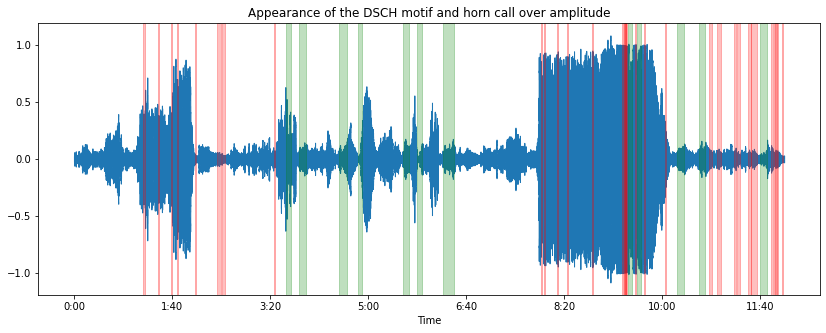

In [8]:
# Motifs over amplitude
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_full, sr=sr_full)

for loc in all_motifs:
    plt.axvspan(loc[0], loc[-1], color='red', alpha=0.25)
for loc in horn_motifs:
    plt.axvspan(loc[0], loc[-1], color='green', alpha=0.25)
    
plt.title("Appearance of the DSCH motif and horn call over amplitude")
plt.show()

In [9]:
# Consts for sliding windows of density
window_width = 30                            # window width, in seconds
window_step = 5                              # window step, in seconds
n = int(math.ceil(durr / window_step))       # number of windows in mvmt
fps = 80                                     # number of frames per second in spectrogram

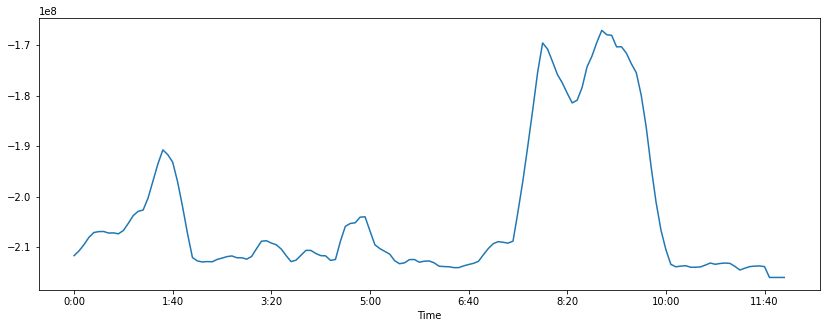

In [10]:
# Density of percussiveness over time

# Initialize data
percuss_data = np.zeros((n, 2))
for i in range(n):
    percuss_data[i, 0] = i * window_step                                        # Time points
    percuss_data[i, 1] = Pdb.shape[0] * np.min(Pdb) * (window_width * 80)       # Default minimum value

# Calculate data from sliding window
i = 0
time = 0
while time < durr:
    percuss_data[i, 1] = 0
    for j in range(window_width*80):
        if(time * 80 + j >= Pdb.shape[1]): 
            percuss_data[i, 1] += Pdb.shape[0] * np.min(Pdb) * (window_width*80 - j)
            break
  
        percuss_data[i, 1] += np.sum(Pdb[:, int(time*80 + j)])
    else:
        i += 1
        time += window_step
        continue
        print(time)
    break

# Plot data
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(percuss_data[:, 0], percuss_data[:, 1])

librosa.display.__decorate_axis(ax.xaxis, "time")

plt.show()

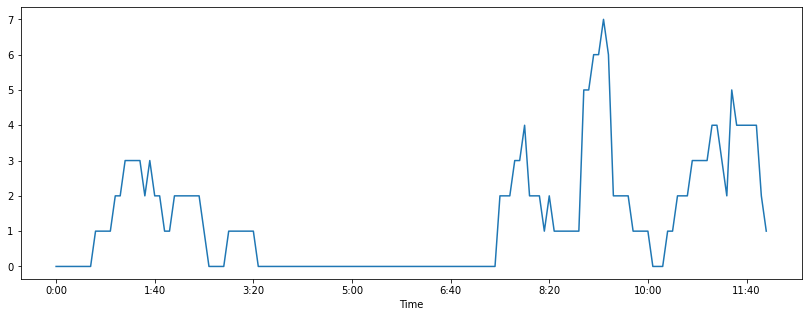

In [11]:
# Density of motifs over time

# Initialize data
density_data = np.zeros((n, 2))
for i in range(n):
    density_data[i, 0] = i * window_step             # time points

# Slide window
for i in range(n):
    # Add the relevant motifs to this window
    for loc in all_motifs:
        if(0 <= loc[0] - i*window_step <= window_width):
            density_data[i, 1] += 1

# Plot data
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(density_data[:, 0], density_data[:, 1])

librosa.display.__decorate_axis(ax.xaxis, "time")

plt.show()

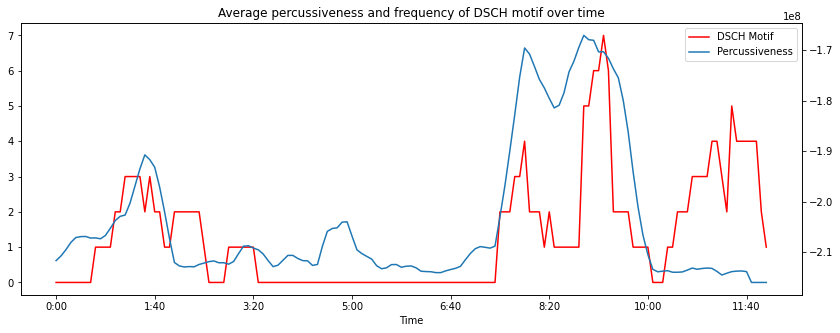

In [12]:
# Plot overlap
fig, ax = plt.subplots(figsize=(14, 5))

ax = [ax, ax.twinx()]
line1 = ax[0].plot(density_data[:, 0], density_data[:, 1], color='red')
line2 = ax[1].plot(percuss_data[:, 0], percuss_data[:, 1])

ax[0].legend(line1 + line2, ['DSCH Motif', 'Percussiveness'])
plt.title("Average percussiveness and frequency of DSCH motif over time")
librosa.display.__decorate_axis(ax[0].xaxis, "time")

plt.show()

In [13]:
# Correlation btwn motif + percussiveness

a = density_data[:125, 1]
b = percuss_data[:125, 1]
pearson_corr = np.corrcoef(a, b, rowvar=False)
print(pearson_corr)

[[1.        0.7296597]
 [0.7296597 1.       ]]


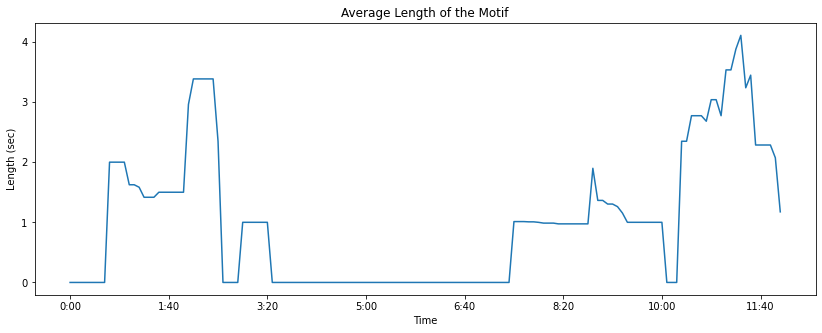

In [14]:
# Density + Length of motif over time

# Initialize data
density_len_data = np.zeros((n, 2))
for i in range(n):
    density_len_data[i, 0] = i * window_step              # time points

# Slide window
for i in range(n):
    count = 0
    # Add the relevant motifs to this window
    for loc in all_motifs:
        if(0 <= loc[0] - i*window_step <= window_width):
            density_len_data[i, 1] += loc[-1] - loc[0]
            count += 1
    if count > 0: density_len_data[i, 1] /= count

# Plot data
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(density_len_data[:, 0], density_len_data[:, 1])

plt.title("Average Length of the Motif")
librosa.display.__decorate_axis(ax.xaxis, "time")
ax.set_ylabel("Length (sec)")

plt.show()

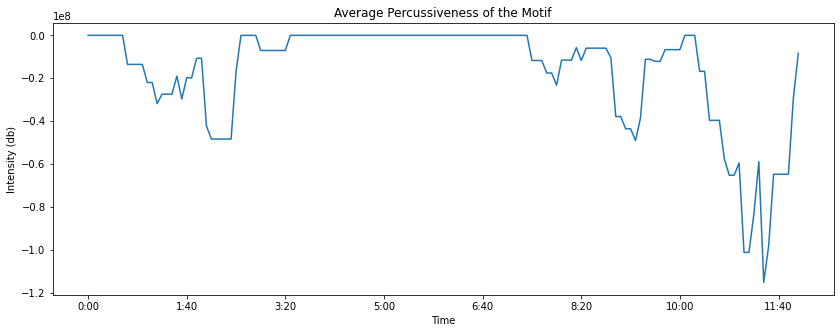

In [15]:
# Percussiveness of motif over time

# Initialize data
patt_percuss_data = np.zeros((n, 2))
for i in range(n):
    patt_percuss_data[i, 0] = i * window_step            # time points

# Slide window
for i in range(n):
    count = 0
    # Add the relevant motifs to this window
    for loc in all_motifs:
        if(0 <= loc[0] - i*window_step <= window_width):
            # Total percussive intensity during this motif
            patt_percuss_data[i, 1] += np.sum(Pdb[:, int(loc[0] * 80):int(loc[-1] * 80)])
    if count > 0:
        patt_percuss_data[i,1] /= count

# Plot data
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(patt_percuss_data[:, 0], patt_percuss_data[:, 1])

librosa.display.__decorate_axis(ax.xaxis, "time")
plt.title("Average Percussiveness of the Motif")
ax.set_ylabel("Intensity (db)")

plt.show()